# Sailco Problem 

>Adapted from https://laurentlessard.com/teaching/cs524/slides/5%20-%20network%20flow%20problems.pdf

>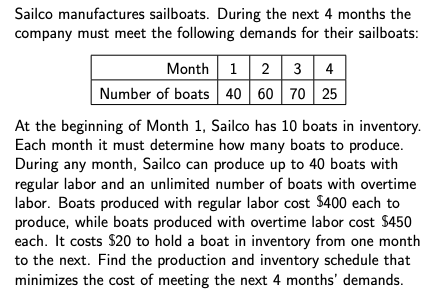


Our decision variables are:
$$
\begin{equation*}
\ x_{1},x_{2},x_{3},x_{4} \text{ boats produced each month with regular labor}\\
\ y_{1},y_{2},y_{3},y_{4} \text{ boats produced each month with overtime labor}\\
\ h_{1},h_{2},h_{3},h_{4},h_{5} \text{ boats in inventory at the start of each month}\\
\end{equation*}
$$

Our parameters are:
$$
\begin{equation*}
\ d_{1},d_{2},d_{3},d_{4} \text{ demand (in boats) for each month}\\
\end{equation*}
$$

Our constraints are:
$$
\begin{equation*}
\ 0 \leq x_{i}\leq 40 \text{ monthly limit on regular labor production}\\
\ y_{i}\geq 0 \text{ unlimited overtime production}\\
\ h_{i} + x_{i} + y_{i} = d_{i} + h_{i+1} \text { for i = 1,2,3,4 (Conservation of boats)}\\
\ h_{1} = 10 \text { we start with 10 boats in inventory}
\end{equation*}
$$

In [1]:
#Create a list with the monthly demand for boats
d = [40, 60, 70, 25]

In [2]:
#Import PuLP modeler functions
from pulp import *

In [3]:
#Create the 'prob' variable to contain the problem data
prob = LpProblem("Sailco", LpMinimize)

In [4]:
#Create the variable Xi using list comp so we get x_1, x_2, x_3, x_4
x = LpVariable.dicts("x",[val for val in range (1,5)],0,40,LpInteger)
#Create the variable yi using list comp so we get y_1, y_2, y_3, y_4
y = LpVariable.dicts("y",[val for val in range (1,5)],0,None,LpInteger)
#Create the variable hi using list comp so we get h_1, h_2, h_3, h_4, h_5
h = LpVariable.dicts("h",[val for val in range (1,6)],0,None,LpInteger)

In [5]:
#add objective function

prob += (sum(400*x[month] + 450*y[month] + 20*h[month] for month in range(1,5)) + 20*h[len(h)]), "Objective"

#prob += 400*sum(x) + 450*sum(y) + 20*sum(h), "Objective"

In [6]:
#Add constraints 

#constraint that Xi <= 40 already accounted for
prob += h[1] == 10, "" #Constraint that we start the problem with 10 boats in inventory
for month in range (1,5):
    prob += h[month] + x[month] + y[month] == d[month-1] + h[month+1], "" #note d is zero indexed

In [7]:
prob.writeLP("SailCo.lp")

In [8]:
prob.solve()

1

In [9]:
#Print the variables
for v in prob.variables():
    print(v.name, "=", v.varValue)

h_1 = 10.0
h_2 = 10.0
h_3 = 0.0
h_4 = 0.0
h_5 = 0.0
x_1 = 40.0
x_2 = 40.0
x_3 = 40.0
x_4 = 25.0
y_1 = 0.0
y_2 = 10.0
y_3 = 30.0
y_4 = 0.0
